In [1]:
import pandas as pd 
import numpy as np 

# 1. 서울시 구별 CCTV와 인구수 시각화 
# 2. cctv.xlsx 파일과 pop.txt 파일의 내용 읽기

cctv = pd.read_excel('../data/cctv.xlsx')
print(cctv)

기관명    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0     강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448
1     강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385
2     강 북 구  1265     243.0   88.0  141.0     74    145    254      1    319
3     강 서 구  1617     219.0  155.0  118.0    230    187    190    264    254
4     관 악 구  3985     430.0   56.0  419.0    487    609    619    694    671
5     광 진 구  1581     470.0   42.0   83.0     87     64     21    468    346
6     구 로 구  3227     852.0  219.0  349.0    187    268    326    540    486
7     금 천 구  1634      27.0   17.0  242.0    101    382    136    199    530
8     노 원 구  1906     481.0  117.0  203.0     80    461    298    110    156
9     도 봉 구   858     197.0   66.0    8.0    185     59    155    117     71
10     동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
11    동 작 구  1780     238.0   93.0   29.0    503    130    254    278    255
12    마

In [2]:
# read_csv 로 불러올때는 확장자명이 의미가 없다. txt 도 불러올수있다. 
# pop = pd.read_csv('../data/pop.txt')
# print(pop) 

# 데이터를 까보자 txt파일
# 데이터가 , 가 아니라 tab 으로 구분되어있다. 
# 값들이 천단위기호가 붙어있다.
# 컬럼이 세줄이다. (두줄을 건너뛰어야된다) 

In [3]:
# delimiter='\t' 구분자는 탭 
# thouansds=',' 천단위 구분기호 ,
# skiprows=2 컬럼 두줄 건너뛰고 읽기

pop = pd.read_csv('../data/pop.txt',
                    delimiter='\t',
                    skiprows=2,
                    thousands=',')
print(pop) 

기간   자치구       세대         계       남자       여자      계.1     남자.1  \
0   2019.3/4    합계  4315921  10025927  4887068  5138859  9740398  4751696   
1   2019.3/4   종로구    73942    162860    78523    84337   151767    73952   
2   2019.3/4    중구    62593    136663    67030    69633   126409    62161   
3   2019.3/4   용산구   109911    244989   119499   125490   228830   110478   
4   2019.3/4   성동구   136466    311290   152134   159156   303158   148510   
5   2019.3/4   광진구   164173    368337   177749   190588   352692   171103   
6   2019.3/4  동대문구   163606    363779   178958   184821   346551   172440   
7   2019.3/4   중랑구   181448    403776   199959   203817   398812   197927   
8   2019.3/4   성북구   191465    454114   218857   235257   441590   214094   
9   2019.3/4   강북구   143680    317875   154784   163091   314090   153356   
10  2019.3/4   도봉구   138603    337594   164883   172711   335280   163953   
11  2019.3/4   노원구   217058    539829   261141   278688   535282   259204   
12  2019.

In [4]:
# cctv.xlsx 의 구이름이 한칸씩 띄어져 있다. 
# pop.tvt의 구이름이 두번째 부터있다.
# 3. 컬럼이름 수정하고 구이름을 동일한 형태로 만들기.

# inplace=True 가 설정되면 현재 데이터프레임에 적용하고 
# 이 옵션이 없으면 현재 데이터프레임을 복사해서 작업하고 
# return을 해준다. 
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)

#cctv의 구별 데이터에서 공백을 전부 제거하기 
gu = [] 
for x in cctv['구별'] : 
    gu.append(x.replace(' ',''))
cctv['구별'] = gu
print(cctv['구별'])

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object


In [5]:
# 4. 불필요한 컬럼이나 열을 제거 

# 첫번째 방법 : pop에서 필요한 행과 열만 가져오기(기간, 구별, 계, 남자, 여자)
pop = pop[['기간', '구별', '계', '남자', '여자']]
print(pop)

기간    구별         계       남자       여자
0   2019.3/4    합계  10025927  4887068  5138859
1   2019.3/4   종로구    162860    78523    84337
2   2019.3/4    중구    136663    67030    69633
3   2019.3/4   용산구    244989   119499   125490
4   2019.3/4   성동구    311290   152134   159156
5   2019.3/4   광진구    368337   177749   190588
6   2019.3/4  동대문구    363779   178958   184821
7   2019.3/4   중랑구    403776   199959   203817
8   2019.3/4   성북구    454114   218857   235257
9   2019.3/4   강북구    317875   154784   163091
10  2019.3/4   도봉구    337594   164883   172711
11  2019.3/4   노원구    539829   261141   278688
12  2019.3/4   은평구    486159   234228   251931
13  2019.3/4  서대문구    324089   153618   170471
14  2019.3/4   마포구    385605   181368   204237
15  2019.3/4   양천구    463931   227911   236020
16  2019.3/4   강서구    600240   290942   309298
17  2019.3/4   구로구    439850   219971   219879
18  2019.3/4   금천구    252868   129510   123358
19  2019.3/4  영등포구    402478   201944   200534
20  2019.3/4   동작구    4

In [6]:
# 두번째 방법 : 0번 행을 제거 
pop.drop([0], inplace=True)

# 여성비율이라는 새로운 컬럼을 추가 - 여자/계 * 100
pop['여성비율'] = pop['여자']/pop['계'] * 100
print(pop)

기간    구별       계      남자      여자       여성비율
1   2019.3/4   종로구  162860   78523   84337  51.784969
2   2019.3/4    중구  136663   67030   69633  50.952343
3   2019.3/4   용산구  244989  119499  125490  51.222708
4   2019.3/4   성동구  311290  152134  159156  51.127887
5   2019.3/4   광진구  368337  177749  190588  51.742833
6   2019.3/4  동대문구  363779  178958  184821  50.805846
7   2019.3/4   중랑구  403776  199959  203817  50.477740
8   2019.3/4   성북구  454114  218857  235257  51.805714
9   2019.3/4   강북구  317875  154784  163091  51.306646
10  2019.3/4   도봉구  337594  164883  172711  51.159381
11  2019.3/4   노원구  539829  261141  278688  51.625237
12  2019.3/4   은평구  486159  234228  251931  51.820701
13  2019.3/4  서대문구  324089  153618  170471  52.600057
14  2019.3/4   마포구  385605  181368  204237  52.965340
15  2019.3/4   양천구  463931  227911  236020  50.873945
16  2019.3/4   강서구  600240  290942  309298  51.529055
17  2019.3/4   구로구  439850  219971  219879  49.989542
18  2019.3/4   금천구  252868  129510  12

In [7]:
# 5. 두개의 데이터프레임 합치기 
# cctv와 pop를 합치기 - 기준은 구별로 

df=pd.merge(cctv, pop, on='구별')
print(df)

구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   
12   

In [8]:
# 6. 합쳐진 데이터프레임에서 불필요한 컬럼 제거 
# 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 기간
# drop으로 지울때 주의 요망(그냥지우면 행이지워짐. 뒤에 옵션들을 잘 기억하자.)
df.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '기간'], axis=1, inplace=True)
print(df)

구별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  549043  262829  286214  52.129615
1    강동구  1879    385  430522  212590  217932  50.620410
2    강북구  1265    319  317875  154784  163091  51.306646
3    강서구  1617    254  600240  290942  309298  51.529055
4    관악구  3985    671  519953  260386  259567  49.921243
5    광진구  1581    346  368337  177749  190588  51.742833
6    구로구  3227    486  439850  219971  219879  49.989542
7    금천구  1634    530  252868  129510  123358  48.783555
8    노원구  1906    156  539829  261141  278688  51.625237
9    도봉구   858     71  337594  164883  172711  51.159381
10  동대문구  2003    197  363779  178958  184821  50.805846
11   동작구  1780    255  410487  198593  211894  51.620149
12   마포구  1935    195  385605  181368  204237  52.965340
13  서대문구  2121    194  324089  153618  170471  52.600057
14   서초구  2835    396  435258  208297  226961  52.144016
15   성동구  2679    294  311290  152134  159156  51.127887
16   성북구  3003    643  454114  218857

In [9]:
# 7. 구별 컬럼을 인덱스로 설정
df.set_index('구별', inplace=True)
print(df)

소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  549043  262829  286214  52.129615
강동구   1879    385  430522  212590  217932  50.620410
강북구   1265    319  317875  154784  163091  51.306646
강서구   1617    254  600240  290942  309298  51.529055
관악구   3985    671  519953  260386  259567  49.921243
광진구   1581    346  368337  177749  190588  51.742833
구로구   3227    486  439850  219971  219879  49.989542
금천구   1634    530  252868  129510  123358  48.783555
노원구   1906    156  539829  261141  278688  51.625237
도봉구    858     71  337594  164883  172711  51.159381
동대문구  2003    197  363779  178958  184821  50.805846
동작구   1780    255  410487  198593  211894  51.620149
마포구   1935    195  385605  181368  204237  52.965340
서대문구  2121    194  324089  153618  170471  52.600057
서초구   2835    396  435258  208297  226961  52.144016
성동구   2679    294  311290  152134  159156  51.127887
성북구   3003    643  454114  218857  235257  51.805714
송

In [10]:
# 8. 그래프 그리기 위한 패키지 
import matplotlib.pyplot as plt 

# 그래프에서 한글 처리를 위한 패키지 
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

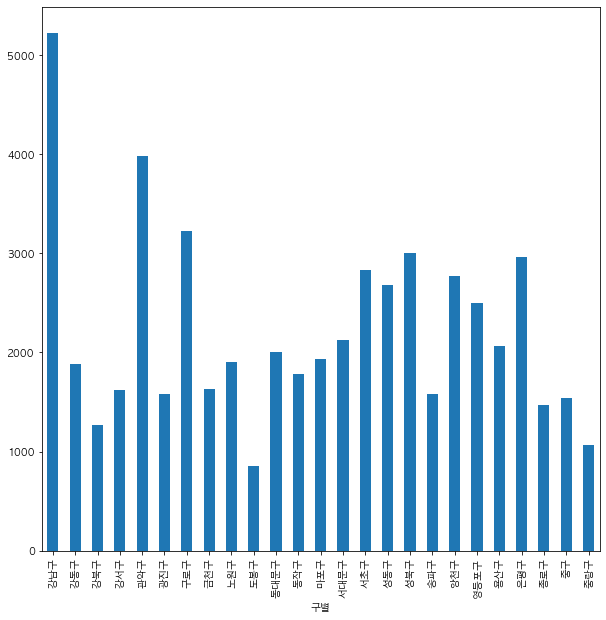

In [11]:
# cctv 개수를 가지고 막대 그래프 그리기 (kin=barh 로 하면 세로그래프)
df['소계'].plot(kind='bar', figsize=(10,10))
plt.show()

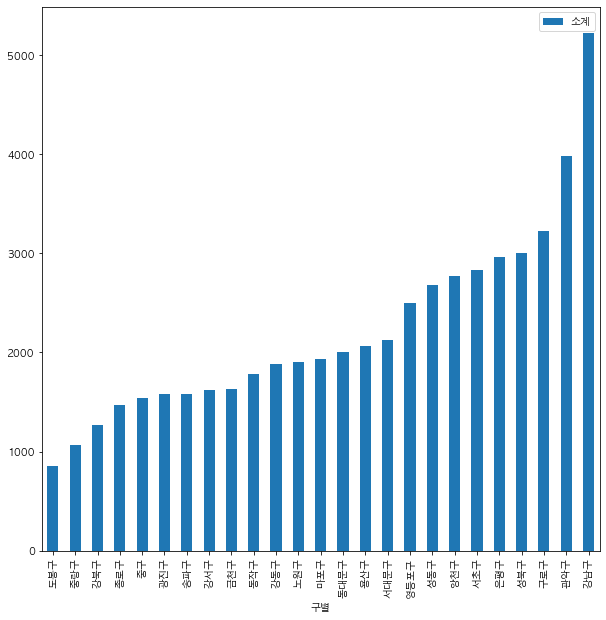

In [12]:
# 정렬을 해서 보이는 것도 나쁘진않다. 
df['소계'].sort_values().plot(kind='bar', figsize=(10,10))
plt.legend()
plt.show()

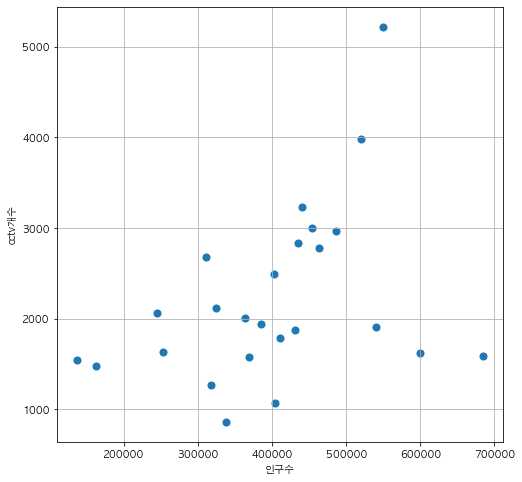

In [13]:
# 9.인구수(계)와 cctv개수(소계)를 가지고 산포도 그리기 
plt.figure(figsize=(8,8))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.grid()
plt.show()

#회귀분석 할때는 이렇게 까지 쓸 필요없다

In [14]:
# 10. numpy의 polyfit 이라는 함수를 이용해서 다항식을 구해서 선 그래프 그리기

# 계와 소계의 데이터를 가지고 다항식 구하기 
# 뒤에 1은 1차다항식, 2는 2차다항식(숫자가 커지면 정확도가 올라가지만 계산이 오래걸림)
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

# 출력값 : 0.002878 x + 1067 
# 출력값 : 기울기       절편 


0.002866 x + 1070


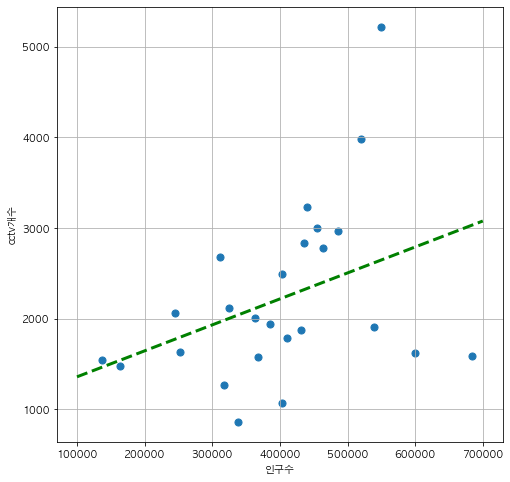

In [15]:
# 선그래프 그리기 
# (X축 인구수를보고)100000 부터 700000 까지를 100개로 분할한 배열을 생성 
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(8,8))
plt.scatter(df['계'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.grid()
plt.show()

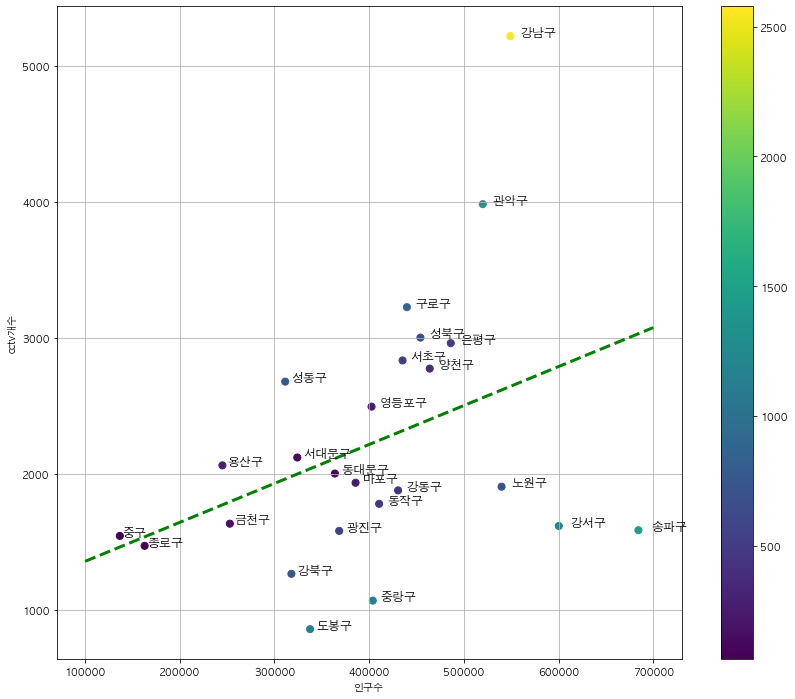

In [16]:
# 11. 산포도의 각 점에 자신의 이름을 표시하고 잔차를 점의 색상으로 설정

# 잔차를 색상으로 표시하고 지역 이름을 점위에 출력 
# 잔차 계산
df['잔차'] = np.abs(df['소계'] - f1(df['계']))
plt.figure(figsize=(14,12))
plt.scatter(df['계'], df['소계'], c=df['잔차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 그래프에 텍스트 출력하기
for n in range(25) : 
    # 각 점들의 좌표 우측 
    plt.text(df['계'][n] * 1.02, 
             df['소계'][n] * 1, 
             df.index[n], 
             fontsize=12)

plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.colorbar()
plt.grid()
plt.show()